In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
# Loading the CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
class_names = [
    "airplane", "automobile", "bird", "cat", "deer", 
    "dog", "frog", "horse", "ship", "truck"
]

In [5]:
# Defining the network architecture
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten 32x32x3 images
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Training the model with SGD optimizer
model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


1563/1563 [==============================] - 5s 3ms/step - loss: 1.9079 - accuracy: 0.3126 - val_loss: 1.8921 - val_accuracy: 0.3211
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7275 - accuracy: 0.3851 - val_loss: 1.6855 - val_accuracy: 0.4025
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6494 - accuracy: 0.4123 - val_loss: 1.6306 - val_accuracy: 0.4172
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5940 - accuracy: 0.4342 - val_loss: 1.6164 - val_accuracy: 0.4173
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5529 - accuracy: 0.4484 - val_loss: 1.5298 - val_accuracy: 0.4553
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5147 - accuracy: 0.4629 - val_loss: 1.5429 - val_accuracy: 0.4492
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4835 - accuracy: 0.4740 - val_loss: 1.4750 - val_accurac

In [8]:
# Evaluating the network
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


313/313 [==============================] - 0s 1ms/step - loss: 1.6371 - accuracy: 0.4346
Test Loss: 1.6370892524719238
Test Accuracy: 0.43459999561309814


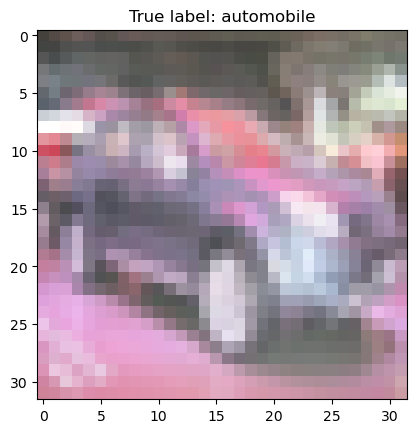

In [9]:
# Displaying a random test image with its predicted class
n = random.randint(0, x_test.shape[0] - 1)
plt.imshow(x_test[n])
plt.title(f"True label: {class_names[y_test[n][0]]}")
plt.show()

In [10]:
# Predicting the class of the selected image
predicted_value = model.predict(x_test)
print("Predicted class:", class_names[np.argmax(predicted_value[n])])

313/313 [==============================] - 0s 1ms/step
Predicted class: truck


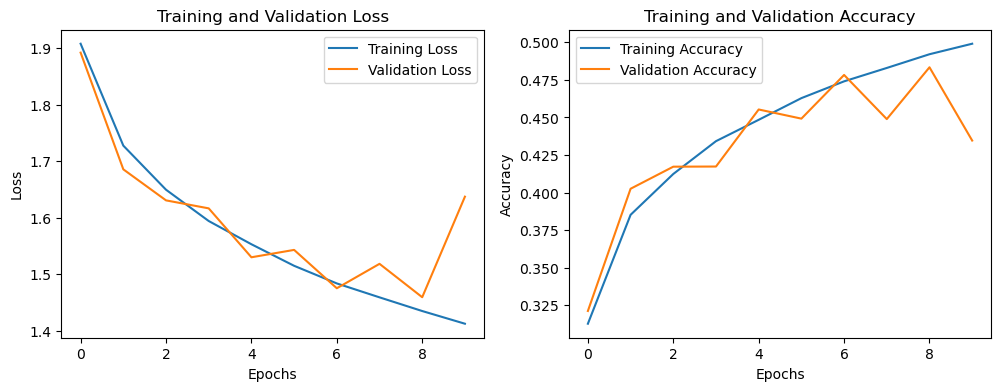

In [11]:
# Plotting the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()